## Load anamnesis from files

In [214]:
import numpy as np
import pandas as pd
import os
import re

In [215]:
PATH_TO_ANAMNESIS_DIR = "../data/anamnesis_corpus"

In [216]:
filenames = os.listdir(PATH_TO_ANAMNESIS_DIR)

In [217]:
all_anamnesis_filepath = [ PATH_TO_ANAMNESIS_DIR+os.sep+name for name in filenames]
all_anamnesis_filepath

['../data/anamnesis_corpus/16256_С2013 17275_С2013.xml.txt',
 '../data/anamnesis_corpus/21497_С2015.xml.txt',
 '../data/anamnesis_corpus/18001_С2015.xml.txt',
 '../data/anamnesis_corpus/4112_С2014.xml.txt',
 '../data/anamnesis_corpus/554_С2011.xml.txt',
 '../data/anamnesis_corpus/3082_С2012 3241_2012.xml.txt',
 '../data/anamnesis_corpus/3612_С2011.xml.txt',
 '../data/anamnesis_corpus/17772_С2012.xml.txt',
 '../data/anamnesis_corpus/1132_С2011.xml.txt',
 '../data/anamnesis_corpus/11837_С2013.xml.txt',
 '../data/anamnesis_corpus/12911_С2013.xml.txt',
 '../data/anamnesis_corpus/15831_С2015.xml.txt',
 '../data/anamnesis_corpus/18243_С2012.xml.txt',
 '../data/anamnesis_corpus/10299_С2010 10868_С2010.xml.txt',
 '../data/anamnesis_corpus/8093_С2013.xml.txt',
 '../data/anamnesis_corpus/3511_С2012.xml.txt',
 '../data/anamnesis_corpus/26958_С2015.xml.txt',
 '../data/anamnesis_corpus/3_С2015 1154_С2015.xml.txt',
 '../data/anamnesis_corpus/16252_С2013.xml.txt',
 '../data/anamnesis_corpus/2447_С201

In [218]:
all_anamnesis_texts = list()
for path in all_anamnesis_filepath:
    with open(path, encoding="cp1251") as file:
        all_anamnesis_texts.append(file.read())

In [219]:
all_anamnesis_texts

['   Хронические заболевания в анамнезе  : ГБ; сахарный диабет II типа декомпенсированный, с 1996г.. принимает манинил 1 таб./сут.   Гинекологический анамнез:  Menses: отсутствуют; Менопауза: с 50 лет   Наследственность:  не отягощена   Страховой анамнез:  не работает   Аллергологический анамнез  : без особенностей   Вредные привычки:  курение 1 пачка в день, с 1996г.; алкоголь редко   Образ жизни  : бытовые условия удовлетворительные; питание регулярное, разнообразное  \n',
 '  Псориатический артрит. ЖКБ. Хр.холецистит. Холецистэктомия в 2014г.    Наследственность:  заболевания у родственников отец: псориаз    Страховой анамнез:  работает; больничный лист нужен; дата выдачи больничного листа 12.10.2015    Аллергологический анамнез  : без особенностей    Вредные привычки:  отрицает    Профессиональные вредности  отрицает    Образ жизни  : бытовые условия удовлетворительные; питание регулярное   \n',
 '   В молодости работал в трюме ледоколов, работа с краской. Работает ген директором О

In [220]:
len(all_anamnesis_texts)

2356

In [221]:
df = pd.DataFrame(filenames, columns=["filename"])

In [222]:
df["text"] = all_anamnesis_texts

In [223]:
df

,filename,text
0,16256_С2013 17275_С2013.xml.txt,Хронические заболевания в анамнезе : ГБ; с...
1,21497_С2015.xml.txt,Псориатический артрит. ЖКБ. Хр.холецистит. Х...
2,18001_С2015.xml.txt,"В молодости работал в трюме ледоколов, рабо..."
3,4112_С2014.xml.txt,Хронические заболевания в анамнезе : ГБ; о...
4,554_С2011.xml.txt,Перенесенные состояния: травмы переломы: пр...
...,...,...
2351,19472_С2015.xml.txt,Страховой анамнез: работает; больничный лис...
2352,8284_С2013.xml.txt,не работает. пенсионер. инвалидность 2 гр. ...
2353,7320_С2013.xml.txt,Подробно собрать анамнез не удалось из-за ре...
2354,13516_С2013.xml.txt,Хронические заболевания в анамнезе : ГБ; И...


## Tokenize anamnesis texts

Let's tokenize anamnesis

In [224]:
!pip install mosestokenizer

In [225]:
from mosestokenizer import MosesTokenizer
tokenize = MosesTokenizer(lang="ru")

In [226]:
all_anamnesis_tokens = [tokenize(text) for text in df["text"]]

In [227]:
df["tokens"] = all_anamnesis_tokens

In [228]:
df["tokens"]

0       [Хронические, заболевания, в, анамнезе, :, ГБ,...
1       [Псориатический, артрит, ., ЖКБ, ., Хр.холецис...
2       [В, молодости, работал, в, трюме, ледоколов, ,...
3       [Хронические, заболевания, в, анамнезе, :, ГБ,...
4       [Перенесенные, состояния, :, травмы, переломы,...
                              ...                        
2351    [Страховой, анамнез, :, работает, ;, больничны...
2352    [не, работает., пенсионер., инвалидность, 2, г...
2353    [Подробно, собрать, анамнез, не, удалось, из, ...
2354    [Хронические, заболевания, в, анамнезе, :, ГБ,...
2355    [Хронические, заболевания, в, анамнезе, :, ГБ,...
Name: tokens, Length: 2356, dtype: object

## Filter tokens and make some analyse of words count distribution

Let's filter tokens

In [229]:
df["tokens_size"] = [len(tokens) for tokens in df["tokens"]]

<AxesSubplot:>

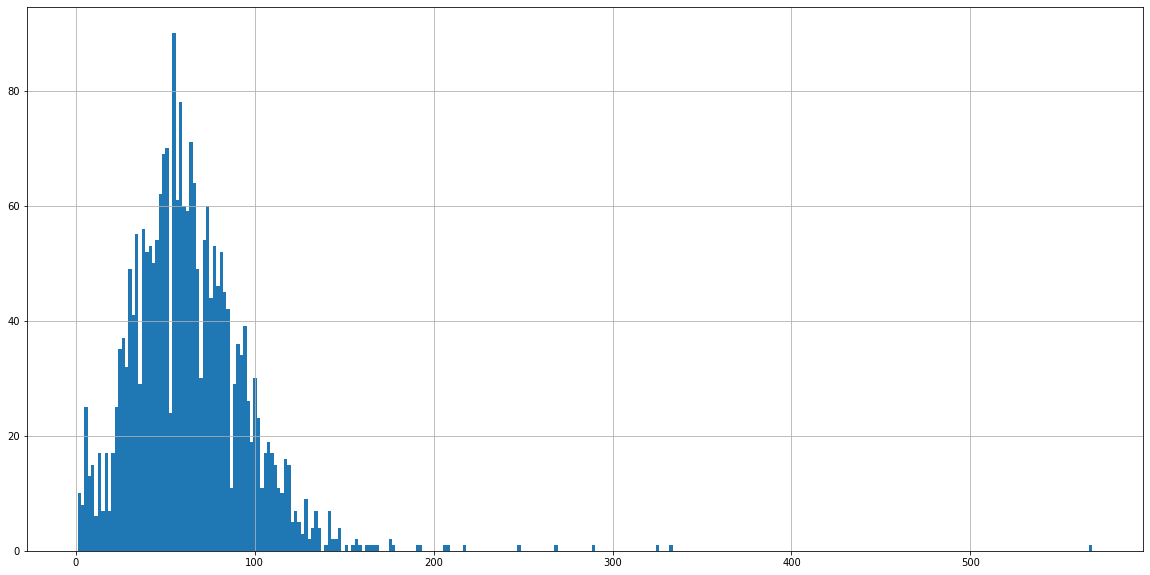

In [230]:
df["tokens_size"].hist(bins=300, figsize=(20,10))

WTF? Data in all_anam.pickle and all_anamnesis.pickle is quite different! Check graphics in the CheckAnamnesisData.ipynd

In [231]:
# Filter words with any non-сyrillic character
def filter_invalid_token(token_list):
    return [token for token in token_list if (not re.search("[^а-яА-Я]", token)) & (not token.isupper())]

In [232]:
df["filtered_tokens"] = [filter_invalid_token(tokens) for tokens in df["tokens"]]

In [233]:
df["filtered_tokens"]

0       [Хронические, заболевания, в, анамнезе, сахарн...
1       [Псориатический, артрит, Холецистэктомия, в, Н...
2       [молодости, работал, в, трюме, ледоколов, рабо...
3       [Хронические, заболевания, в, анамнезе, остеох...
4       [Перенесенные, состояния, травмы, переломы, пр...
                              ...                        
2351    [Страховой, анамнез, работает, больничный, лис...
2352    [не, инвалидность, гр, Аллергологический, анам...
2353    [Подробно, собрать, анамнез, не, удалось, из, ...
2354    [Хронические, заболевания, в, анамнезе, стенок...
2355    [Хронические, заболевания, в, анамнезе, стенок...
Name: filtered_tokens, Length: 2356, dtype: object

In [234]:
df["filtered_tokens_size"] = [len(tokens) for tokens in df["filtered_tokens"]]

<AxesSubplot:>

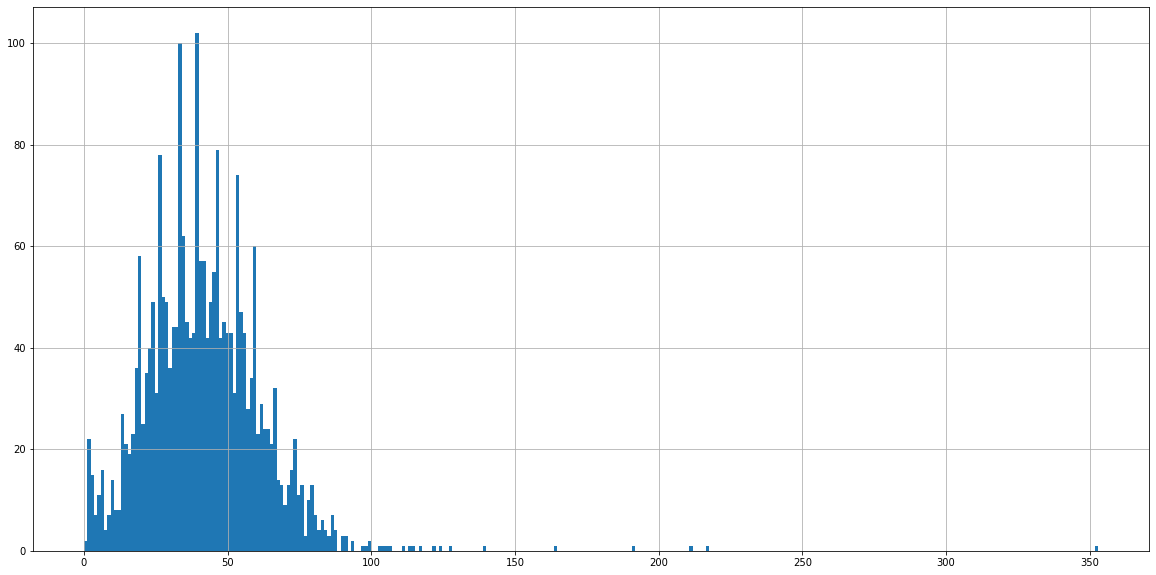

In [235]:
df["filtered_tokens_size"].hist(bins=300, figsize=(20,10))

In [236]:
quantile_levels = [.25,.5,.75,.9,.95,.99]
filtered_tokens_size_quantiles = df["filtered_tokens_size"].quantile(quantile_levels)
filtered_tokens_size_quantiles

0.25    28.0
0.50    41.0
0.75    54.0
0.90    65.0
0.95    74.0
0.99    91.0
Name: filtered_tokens_size, dtype: float64

In [237]:
df["filtered_tokens_size"].value_counts()

35     62
42     57
41     57
45     55
33     53
       ..
111     1
217     1
124     1
1       1
113     1
Name: filtered_tokens_size, Length: 113, dtype: int64

Check anamnesis with extremely low word counts

In [238]:
df[df["filtered_tokens_size"] <= 11]

,filename,text,tokens,tokens_size,filtered_tokens,filtered_tokens_size
6,3612_С2011.xml.txt,Аллергологический анамнез : без особенност...,"[Аллергологический, анамнез, :, без, особеннос...",9,"[Аллергологический, анамнез, без, особенностей...",7
33,15967_С2012.xml.txt,"С анамнезом жизни ознакомлена, дополнений нет...","[С, анамнезом, жизни, ознакомлена, ,, дополнен...",8,"[анамнезом, жизни, ознакомлена, дополнений, нет]",5
56,4853_С2013.xml.txt,С анамнезом ознакомлена. Дополнений нет. \n,"[С, анамнезом, ознакомлена, ., Дополнений, нет...",7,"[анамнезом, ознакомлена, Дополнений, нет]",4
60,342_С2014.xml.txt,ЛОР-анамнез спокойный. \n,"[ЛОР, @-@, анамнез, спокойный, .]",5,"[анамнез, спокойный]",2
84,8964_С2012.xml.txt,"С анамнезом жизни ознакомлены, дополнений нет...","[С, анамнезом, жизни, ознакомлены, ,, дополнен...",8,"[анамнезом, жизни, ознакомлены, дополнений, нет]",5
...,...,...,...,...,...,...
2278,12959_С2010.xml.txt,Страховой анамнез: не работает Аллерголо...,"[Страховой, анамнез, :, не, работает, Аллергол...",14,"[Страховой, анамнез, не, работает, Аллергологи...",11
2301,7329_С2011.xml.txt,Страховой анамнез: работает Аллергологич...,"[Страховой, анамнез, :, работает, Аллергологич...",13,"[Страховой, анамнез, работает, Аллергологическ...",10
2319,16037_С2014 16946_С2014.xml.txt,Аллергологический анамнез : без особенност...,"[Аллергологический, анамнез, :, без, особеннос...",9,"[Аллергологический, анамнез, без, особенностей...",7
2328,5399_С2015 5460_С2015.xml.txt,Аллергологический анамнез : не отягощен...,"[Аллергологический, анамнез, :, не, отягощен, ...",13,"[Аллергологический, анамнез, не, отягощен, Вре...",10


In [239]:
df = df[df["filtered_tokens_size"] != 0]
df

,filename,text,tokens,tokens_size,filtered_tokens,filtered_tokens_size
0,16256_С2013 17275_С2013.xml.txt,Хронические заболевания в анамнезе : ГБ; с...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",76,"[Хронические, заболевания, в, анамнезе, сахарн...",47
1,21497_С2015.xml.txt,Псориатический артрит. ЖКБ. Хр.холецистит. Х...,"[Псориатический, артрит, ., ЖКБ, ., Хр.холецис...",53,"[Псориатический, артрит, Холецистэктомия, в, Н...",37
2,18001_С2015.xml.txt,"В молодости работал в трюме ледоколов, рабо...","[В, молодости, работал, в, трюме, ледоколов, ,...",122,"[молодости, работал, в, трюме, ледоколов, рабо...",80
3,4112_С2014.xml.txt,Хронические заболевания в анамнезе : ГБ; о...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",111,"[Хронические, заболевания, в, анамнезе, остеох...",71
4,554_С2011.xml.txt,Перенесенные состояния: травмы переломы: пр...,"[Перенесенные, состояния, :, травмы, переломы,...",76,"[Перенесенные, состояния, травмы, переломы, пр...",54
...,...,...,...,...,...,...
2351,19472_С2015.xml.txt,Страховой анамнез: работает; больничный лис...,"[Страховой, анамнез, :, работает, ;, больничны...",14,"[Страховой, анамнез, работает, больничный, лис...",10
2352,8284_С2013.xml.txt,не работает. пенсионер. инвалидность 2 гр. ...,"[не, работает., пенсионер., инвалидность, 2, г...",55,"[не, инвалидность, гр, Аллергологический, анам...",32
2353,7320_С2013.xml.txt,Подробно собрать анамнез не удалось из-за ре...,"[Подробно, собрать, анамнез, не, удалось, из, ...",52,"[Подробно, собрать, анамнез, не, удалось, из, ...",40
2354,13516_С2013.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",57,"[Хронические, заболевания, в, анамнезе, стенок...",41


Check anamnesis with many tokens

In [240]:
for tokens in df[df["filtered_tokens_size"] > 100]["filtered_tokens"]:
    print(tokens)

['в', 'басс', 'по', 'типу', 'ишемии', 'от', 'с', 'умеренным', 'правосторонним', 'гемипарезом', 'Атеросклероз', 'гемодинамически', 'незначимый', 'по', 'от', 'Дисциркуляторная', 'энцефалопатия', 'ст', 'смешанного', 'генеза', 'дисметаболическая', 'сосудистая', 'Состояние', 'после', 'справа', 'от', 'г', 'со', 'слов', 'пациента', 'выписки', 'не', 'представлены', 'Соп', 'Хронический', 'гастрит', 'ремиссия', 'от', 'с', 'последующей', 'выявлен', 'стеноз', 'ствола', 'с', 'переходом', 'на', 'устье', 'до', 'Стеноз', 'устьевой', 'до', 'стеноз', 'до', 'стеноз', 'до', 'выполнено', 'стентирование', 'имплантировано', 'стента', 'с', 'лекарственным', 'покрытием', 'Реваскуляризация', 'не', 'полная', 'Ранний', 'послеоперационный', 'период', 'без', 'осложнений', 'в', 'отделении', 'нейрореанимац', 'состояние', 'пациента', 'ухудшилось', 'наросли', 'маркеры', 'острого', 'повреждения', 'миокарда', 'Учитывая', 'отрицательную', 'динамику', 'течения', 'принято', 'решение', 'о', 'повторной', 'Тип', 'коронарного', 

It's ok

## Try to detect stopwords for anamnesis by tf-idf metric

Let's find stopwords by tf-idf to filter it out

In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [242]:
tf_idf_vectorizer = TfidfVectorizer()

In [243]:
filtered_tokens_string = df["filtered_tokens"].apply(lambda x: " ".join(x))
filtered_tokens_string

0       Хронические заболевания в анамнезе сахарный ди...
1       Псориатический артрит Холецистэктомия в Наслед...
2       молодости работал в трюме ледоколов работа с к...
3       Хронические заболевания в анамнезе остеохондро...
4       Перенесенные состояния травмы переломы правого...
                              ...                        
2351    Страховой анамнез работает больничный лист нуж...
2352    не инвалидность гр Аллергологический анамнез в...
2353    Подробно собрать анамнез не удалось из за резк...
2354    Хронические заболевания в анамнезе стенокардия...
2355    Хронические заболевания в анамнезе стенокардия...
Name: filtered_tokens, Length: 2355, dtype: object

In [244]:
tf_idf_vectorizer = tf_idf_vectorizer.fit(filtered_tokens_string)

In [245]:
feature_names_string = " ".join(tf_idf_vectorizer.get_feature_names_out())
feature_names_string

'аалеригя аанмнез аб аборт аборта аборты абсолютно абсцесс абсцесса аварии аварийной авария августа авиакомпании авиации авиация автозаправочной автокрана автомеханик автомехаником автомобильная автомобиля автослесарем автослесарь аг агонисты адаптации адаптирован адвокат адвокатом адгезиолизис адельфана аденокарцинома аденома аденомой аденомы аденомэктомия аденоэктомии адентия аденэктомия административный администратором аднексэктомией аднексэктомия азербаджане азербайджане акад академии академик аккумуляторщиком аксиллярной активно активноесть активности активность активные активный актрапид актропид акустических акш алекс алергологический алкголем алкоглем алкогол алкоголей алкоголем алкоголизация алкоголизировался алкоголизм алкоголизма алкоголь алкогольная алкогольной алкогольнойгкмп алкогольные алкогольными алкогольных алкогольь алкоголя аллегологический аллегрия аллергены аллергии аллергические аллергический аллергических аллергию аллергия аллерглогический аллерго аллергоанамнез

In [246]:
tf_idf_matrix = tf_idf_vectorizer.transform([feature_names_string])
tf_idf_array = tf_idf_matrix.toarray().flatten()
tf_idf_array

array([0.01484474, 0.01484474, 0.01484474, ..., 0.01409903, 0.01484474,
       0.01484474])

In [247]:
feature_names_with_tf_idf = np.array([tf_idf_vectorizer.get_feature_names_out(), tf_idf_array]).transpose()

In [248]:
tf_idf_df = pd.DataFrame(feature_names_with_tf_idf, columns=["word","tf-idf"])
tf_idf_df

,word,tf-idf
0,аалеригя,0.014845
1,аанмнез,0.014845
2,аб,0.014845
3,аборт,0.014845
4,аборта,0.014845
...,...,...
5079,январь,0.014099
5080,января,0.01357
5081,ярославской,0.014099
5082,ясна,0.014845


In [249]:
sorted_tf_idf_df = tf_idf_df.sort_values("tf-idf", ascending=True, ignore_index=True)
sorted_tf_idf_df

,word,tf-idf
0,анамнез,0.001944
1,аллергологический,0.002053
2,заболевания,0.00206
3,вредные,0.002157
4,привычки,0.002157
...,...,...
5079,местности,0.014845
5080,месяцов,0.014845
5081,месяцы,0.014845
5082,менингиомы,0.014845


## Use stopwords from nltk

So it's too strange, and I mess to find any good threshold for define stop words list
Therefore we will use common stopwords from nltk lib.

In [250]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/Dmitry.Pogrebnoy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [251]:
from nltk.corpus import stopwords
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

Let's use common nltk stopwords for russian and filter it out from anamnesis

In [252]:
df["filtered_tokens_without_nltk_stopwords"] = df["filtered_tokens"].apply(lambda x: list(filter(lambda item: item not in stopwords.words('russian'), x)))
df.head()

/tmp/ipykernel_11322/1978698187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filtered_tokens_without_nltk_stopwords"] = df["filtered_tokens"].apply(lambda x: list(filter(lambda item: item not in stopwords.words('russian'), x)))


,filename,text,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords
0,16256_С2013 17275_С2013.xml.txt,Хронические заболевания в анамнезе : ГБ; с...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",76,"[Хронические, заболевания, в, анамнезе, сахарн...",47,"[Хронические, заболевания, анамнезе, сахарный,..."
1,21497_С2015.xml.txt,Псориатический артрит. ЖКБ. Хр.холецистит. Х...,"[Псориатический, артрит, ., ЖКБ, ., Хр.холецис...",53,"[Псориатический, артрит, Холецистэктомия, в, Н...",37,"[Псориатический, артрит, Холецистэктомия, Насл..."
2,18001_С2015.xml.txt,"В молодости работал в трюме ледоколов, рабо...","[В, молодости, работал, в, трюме, ледоколов, ,...",122,"[молодости, работал, в, трюме, ледоколов, рабо...",80,"[молодости, работал, трюме, ледоколов, работа,..."
3,4112_С2014.xml.txt,Хронические заболевания в анамнезе : ГБ; о...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",111,"[Хронические, заболевания, в, анамнезе, остеох...",71,"[Хронические, заболевания, анамнезе, остеохонд..."
4,554_С2011.xml.txt,Перенесенные состояния: травмы переломы: пр...,"[Перенесенные, состояния, :, травмы, переломы,...",76,"[Перенесенные, состояния, травмы, переломы, пр...",54,"[Перенесенные, состояния, травмы, переломы, пр..."


In [253]:
df["filtered_tokens_without_nltk_stopwords_size"] = df["filtered_tokens_without_nltk_stopwords"].apply(lambda x: len(x))
df.head()

/tmp/ipykernel_11322/687987149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filtered_tokens_without_nltk_stopwords_size"] = df["filtered_tokens_without_nltk_stopwords"].apply(lambda x: len(x))


,filename,text,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size
0,16256_С2013 17275_С2013.xml.txt,Хронические заболевания в анамнезе : ГБ; с...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",76,"[Хронические, заболевания, в, анамнезе, сахарн...",47,"[Хронические, заболевания, анамнезе, сахарный,...",39
1,21497_С2015.xml.txt,Псориатический артрит. ЖКБ. Хр.холецистит. Х...,"[Псориатический, артрит, ., ЖКБ, ., Хр.холецис...",53,"[Псориатический, артрит, Холецистэктомия, в, Н...",37,"[Псориатический, артрит, Холецистэктомия, Насл...",34
2,18001_С2015.xml.txt,"В молодости работал в трюме ледоколов, рабо...","[В, молодости, работал, в, трюме, ледоколов, ,...",122,"[молодости, работал, в, трюме, ледоколов, рабо...",80,"[молодости, работал, трюме, ледоколов, работа,...",69
3,4112_С2014.xml.txt,Хронические заболевания в анамнезе : ГБ; о...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",111,"[Хронические, заболевания, в, анамнезе, остеох...",71,"[Хронические, заболевания, анамнезе, остеохонд...",64
4,554_С2011.xml.txt,Перенесенные состояния: травмы переломы: пр...,"[Перенесенные, состояния, :, травмы, переломы,...",76,"[Перенесенные, состояния, травмы, переломы, пр...",54,"[Перенесенные, состояния, травмы, переломы, пр...",49


## Lemmatization

Also, we need to perform lemmatization for anamnesis words

In [254]:
import pymorphy2
lemmatizer = pymorphy2.MorphAnalyzer()

In [255]:
df["filtered_tokens_without_nltk_stopwords_with_lemmatization"] = \
    df["filtered_tokens_without_nltk_stopwords"].apply(lambda words: list(map(lambda word: lemmatizer.parse(word)[0].normal_form, words)))
df.head()

/tmp/ipykernel_11322/1733179443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filtered_tokens_without_nltk_stopwords_with_lemmatization"] = \


,filename,text,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size,filtered_tokens_without_nltk_stopwords_with_lemmatization
0,16256_С2013 17275_С2013.xml.txt,Хронические заболевания в анамнезе : ГБ; с...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",76,"[Хронические, заболевания, в, анамнезе, сахарн...",47,"[Хронические, заболевания, анамнезе, сахарный,...",39,"[хронический, заболевание, анамнез, сахарный, ..."
1,21497_С2015.xml.txt,Псориатический артрит. ЖКБ. Хр.холецистит. Х...,"[Псориатический, артрит, ., ЖКБ, ., Хр.холецис...",53,"[Псориатический, артрит, Холецистэктомия, в, Н...",37,"[Псориатический, артрит, Холецистэктомия, Насл...",34,"[псориатический, артрит, холецистэктомия, насл..."
2,18001_С2015.xml.txt,"В молодости работал в трюме ледоколов, рабо...","[В, молодости, работал, в, трюме, ледоколов, ,...",122,"[молодости, работал, в, трюме, ледоколов, рабо...",80,"[молодости, работал, трюме, ледоколов, работа,...",69,"[молодость, работать, трюм, ледокол, работа, к..."
3,4112_С2014.xml.txt,Хронические заболевания в анамнезе : ГБ; о...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",111,"[Хронические, заболевания, в, анамнезе, остеох...",71,"[Хронические, заболевания, анамнезе, остеохонд...",64,"[хронический, заболевание, анамнез, остеохондр..."
4,554_С2011.xml.txt,Перенесенные состояния: травмы переломы: пр...,"[Перенесенные, состояния, :, травмы, переломы,...",76,"[Перенесенные, состояния, травмы, переломы, пр...",54,"[Перенесенные, состояния, травмы, переломы, пр...",49,"[перенести, состояние, травма, перелом, правый..."


In [256]:
df["filtered_tokens_without_nltk_stopwords_with_lemmatization_size"] = df["filtered_tokens_without_nltk_stopwords_with_lemmatization"].apply(lambda x: len(x))
df

/tmp/ipykernel_11322/3727891929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filtered_tokens_without_nltk_stopwords_with_lemmatization_size"] = df["filtered_tokens_without_nltk_stopwords_with_lemmatization"].apply(lambda x: len(x))


,filename,text,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size,filtered_tokens_without_nltk_stopwords_with_lemmatization,filtered_tokens_without_nltk_stopwords_with_lemmatization_size
0,16256_С2013 17275_С2013.xml.txt,Хронические заболевания в анамнезе : ГБ; с...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",76,"[Хронические, заболевания, в, анамнезе, сахарн...",47,"[Хронические, заболевания, анамнезе, сахарный,...",39,"[хронический, заболевание, анамнез, сахарный, ...",39
1,21497_С2015.xml.txt,Псориатический артрит. ЖКБ. Хр.холецистит. Х...,"[Псориатический, артрит, ., ЖКБ, ., Хр.холецис...",53,"[Псориатический, артрит, Холецистэктомия, в, Н...",37,"[Псориатический, артрит, Холецистэктомия, Насл...",34,"[псориатический, артрит, холецистэктомия, насл...",34
2,18001_С2015.xml.txt,"В молодости работал в трюме ледоколов, рабо...","[В, молодости, работал, в, трюме, ледоколов, ,...",122,"[молодости, работал, в, трюме, ледоколов, рабо...",80,"[молодости, работал, трюме, ледоколов, работа,...",69,"[молодость, работать, трюм, ледокол, работа, к...",69
3,4112_С2014.xml.txt,Хронические заболевания в анамнезе : ГБ; о...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",111,"[Хронические, заболевания, в, анамнезе, остеох...",71,"[Хронические, заболевания, анамнезе, остеохонд...",64,"[хронический, заболевание, анамнез, остеохондр...",64
4,554_С2011.xml.txt,Перенесенные состояния: травмы переломы: пр...,"[Перенесенные, состояния, :, травмы, переломы,...",76,"[Перенесенные, состояния, травмы, переломы, пр...",54,"[Перенесенные, состояния, травмы, переломы, пр...",49,"[перенести, состояние, травма, перелом, правый...",49
...,...,...,...,...,...,...,...,...,...,...
2351,19472_С2015.xml.txt,Страховой анамнез: работает; больничный лис...,"[Страховой, анамнез, :, работает, ;, больничны...",14,"[Страховой, анамнез, работает, больничный, лис...",10,"[Страховой, анамнез, работает, больничный, лис...",10,"[страховой, анамнез, работать, больничный, лис...",10
2352,8284_С2013.xml.txt,не работает. пенсионер. инвалидность 2 гр. ...,"[не, работает., пенсионер., инвалидность, 2, г...",55,"[не, инвалидность, гр, Аллергологический, анам...",32,"[инвалидность, гр, Аллергологический, анамнез,...",24,"[инвалидность, гр, аллергологический, анамнез,...",24
2353,7320_С2013.xml.txt,Подробно собрать анамнез не удалось из-за ре...,"[Подробно, собрать, анамнез, не, удалось, из, ...",52,"[Подробно, собрать, анамнез, не, удалось, из, ...",40,"[Подробно, собрать, анамнез, удалось, резкого,...",35,"[подробно, собрать, анамнез, удаться, резкий, ...",35
2354,13516_С2013.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",57,"[Хронические, заболевания, в, анамнезе, стенок...",41,"[Хронические, заболевания, анамнезе, стенокард...",35,"[хронический, заболевание, анамнез, стенокарди...",35


Check that the lemmatization doesn't drop any words from anamnesis texts

In [257]:
df[df["filtered_tokens_without_nltk_stopwords_size"] != df["filtered_tokens_without_nltk_stopwords_with_lemmatization_size"]]

,filename,text,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size,filtered_tokens_without_nltk_stopwords_with_lemmatization,filtered_tokens_without_nltk_stopwords_with_lemmatization_size


## Save result dataframe to file

In [258]:
df.to_csv("../data/processed/almazov_anamnesis_dataframe.csv")